In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from fbprophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

warnings.filterwarnings("ignore")

In [336]:
df = pd.read_csv('AirPassengers.csv')

In [337]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.rename( columns = {'#Passengers':'Passengers'})
df = df.set_index('Month')

# SARIMA

SARIMA is a technique for time series modelling that include seasonality (S stands for seasonality). The SARIMA model is specified as (p,d,q)×(P,D,Q)m. The following plot indicates a seasonality pattern in the dataset. Therefore, the SARIMA model will be used alongside with the configurable abovementioned parameters;

  1. __p__ : the number of autoregressive.
  2. __D__ : degree of differencing.
  3. __q__ : the number of moving average terms.
  4. __m__ : number of periods per season.
 



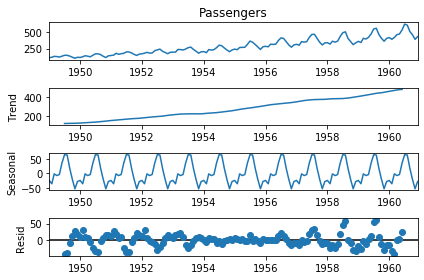

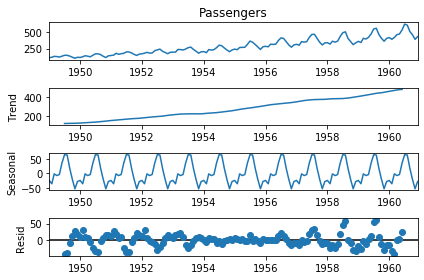

In [338]:
deco = seasonal_decompose(df.Passengers)
deco.plot()

In [339]:
# retrieving the best parameters for p, d, q, m using auto_arima
auto_arima(df.Passengers, seasonal=  True, m = 12, max_p = 7, max_d = 5, max_q = 7, max_P = 4, max_D = 4, max_Q = 4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -497.334
Date:                              Thu, 19 Mar 2020   AIC                           1014.668
Time:                                      12:19:00   BIC                           1043.420
Sample:                                           0   HQIC                          1026.352
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2594      0.160      1.624      0.104      -0.054       0.572
ar.L1         -0.2300      0.091     -2.537      0.011      -0.408      -0.052
ar.L2         -0.1741      0.092     -1.887      0.059      -0.355       0.007
ar.L3          0.7012      0.090      7.796      0.000       0.525       0.877
ma.L1         -0.1096      1.570     -0.070      0.944      -3.186       2.967
ma.L2          0.0918      1.398      0.066      0.948      -2.649       2.832
ma.L3         -0.9809      1.555     -0.631      0.528      -4.028       2.066
ar.S.L12      -0.9256      0.199     -4.660      0.000      -1.315      -0.536
ma.S.L12       0.8332      0.294      2.838      0.005       0.258       1.409
sigma2       109.5743    169.946      0.645      0.519    -223.514     442.662
===================================================================================
Ljung-Box (Q):                       39.16   Jarque-Bera (JB):                 8.07
Prob(Q):                              0.51   Prob(JB):                         0.02
Heteroskedasticity (H):               2.26   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [340]:
train_data = df[:len(df) - 12]
test_data = df[len(df) - 12:]

In [341]:
arima_model = SARIMAX(train_data['Passengers'], order = (3,1,3), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -442.076
Date:                              Thu, 19 Mar 2020   AIC                            902.153
Time:                                      12:19:01   BIC                            927.165
Sample:                                  01-01-1949   HQIC                           912.309
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2604      0.347      0.751      0.453      -0.419       0.940
ar.L2         -0.1055      0.299     -0.353      0.724      -0.691       0.480
ar.L3          0.4213      0.271      1.554      0.120      -0.110       0.953
ma.L1         -0.5150      0.327     -1.575      0.115      -1.156       0.126
ma.L2          0.2612      0.285      0.918      0.359      -0.297       0.819
ma.L3         -0.6798      0.235     -2.895      0.004      -1.140      -0.220
ar.S.L12      -0.9253      0.229     -4.039      0.000      -1.374      -0.476
ma.S.L12       0.8464      0.321      2.637      0.008       0.217       1.476
sigma2        96.8103     11.316      8.556      0.000      74.632     118.988
===================================================================================
Ljung-Box (Q):                       35.22   Jarque-Bera (JB):                 5.33
Prob(Q):                              0.69   Prob(JB):                         0.07
Heteroskedasticity (H):               1.45   Skew:                            -0.20
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [342]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df) - 1, typ="levels").rename("ARIMA Predictions")

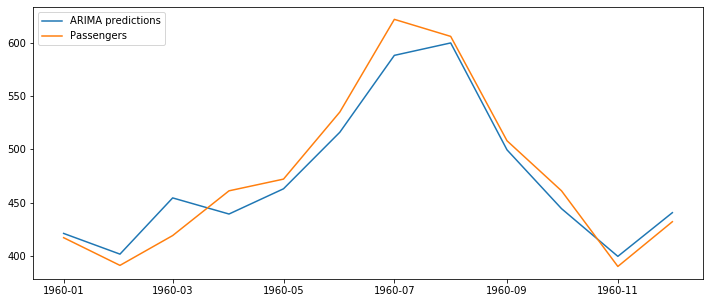

In [343]:
plt.figure(figsize = (12, 5))
plt.plot(arima_pred, label = 'ARIMA predictions')
plt.plot(test_data['Passengers'], label = 'Passengers')
plt.legend(loc="upper left")

plt.show()

In [344]:
ARIMA_rmse = rmse(test_data['Passengers'], arima_pred)
ARIMA_mse = ARIMA_rmse**2

In [345]:
AR = pd.DataFrame({'Model':'SARIMA', 'RMSE':[ARIMA_rmse], 'MSE':[ARIMA_mse]})

# LSTM

Long sort term memory neural networks are trained using backpropagation through time therefore, they are optimal for sequence problems due to their recurrent nature.
Contrary to the typical NNs they have memory block isntead of neurons connected through layers and memorising recent sequences.
Each memory block has the following components:

  __Forget Gate__ : decides what information to discard.
  
  __Input Gate__ : decides what information is kept to update the memory. 
  
  __Output Gate__ : decides the output based on input and memoery.
  
The gates are triggered through the sigmoid function in order to determine the state of the block and information passing through.

In [346]:
dataframe = df.Passengers.values.astype('float32')

In [347]:
# the step element indicates how many time steps in the past should be used for the series prediction
def create_dataset(dataset, step):
    
    X, y = [], []
    
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        X.append(a)
        y.append(dataset[i + step, 0])
        
    return np.array(X), np.array(y)

In [348]:
# scaling is needed in LSTM because of the sigmoid function mentioned above therefore, data is scaled between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [349]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [350]:
step = 1
Xtrain, ytrain = create_dataset(train, step)
Xtest, ytest = create_dataset(test, step)

In [351]:
#reshape to include the time step in the array
Xtrain = numpy.reshape(Xtrain, (Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = numpy.reshape(Xtest, (Xtest.shape[0], 1, Xtest.shape[1]))

In [352]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, step)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(Xtrain, ytrain, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
94/94 [==============================] - 1s 7ms/step - loss: 0.0424
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 11/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 12/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 13/100
94/94 [=================

In [353]:
testPredict = model.predict(Xtest)
testPredict = scaler.inverse_transform(testPredict)
ytest = scaler.inverse_transform([ytest])

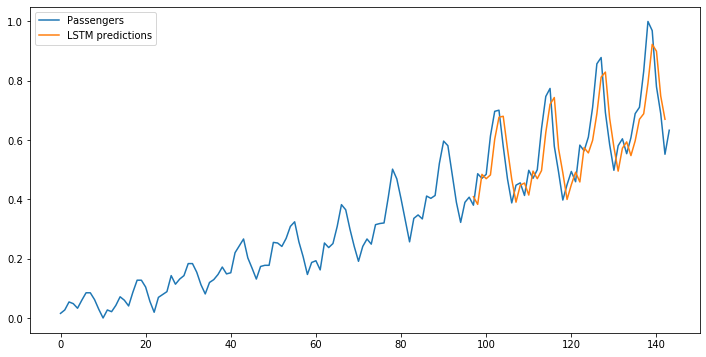

In [354]:
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(dataset), label = 'Passengers')
plt.plot(testPredictPlot, label = 'LSTM predictions')
plt.legend(loc="upper left")

plt.show()

In [355]:
LSTM_rmse = rmse(ytest[0], testPredict[:,0])
LSTM_mse = LSTM_rmse **2

In [356]:
LSTM = pd.DataFrame({'Model':'LSTM', 'RMSE': [LSTM_rmse], 'MSE':[LSTM_mse]})

# Prophet

In [357]:
df = df.reset_index()
# Prophet columns need to be named as ds(datestamp) and y
df.columns = ['ds', 'y']

In [358]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [359]:
# 12month period to predict and monthly frequcny
future = m.make_future_dataframe(periods=12, freq='MS')

In [360]:
prophet_pred = m.predict(future)

As seen on the following plots there is an __updwatd trend__ and __yearly seasonality__ in the dataset.

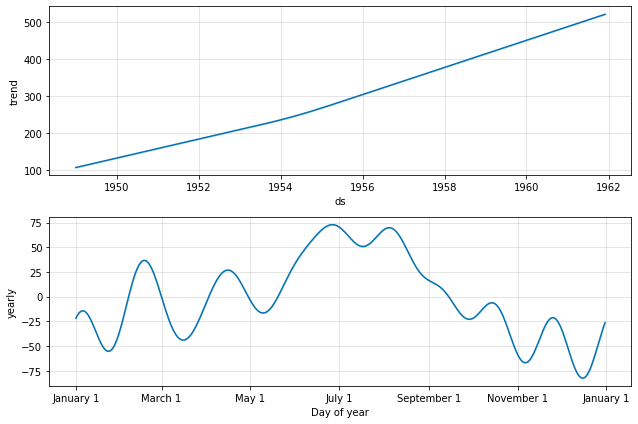

In [361]:
fig2 = m.plot_components(prophet_pred)

In [362]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Predictions" : prophet_pred[-12:]["yhat"]})

In [363]:
prophet_pred = prophet_pred.set_index("Date")

In [364]:
prophet_pred.index.freq = "MS"

In [365]:
test_data["Prophet_Predictions"] = prophet_pred['Predictions'].values

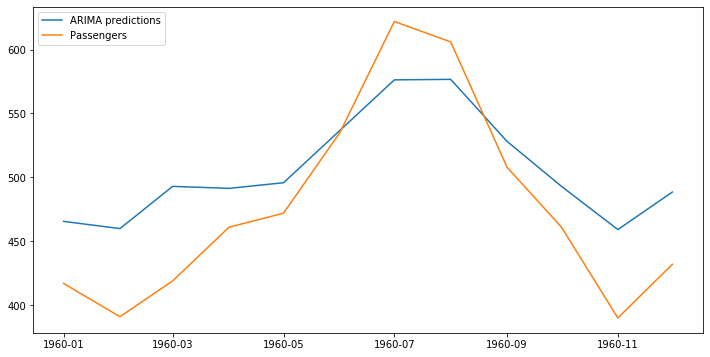

In [366]:
plt.figure(figsize = (12,6))

plt.plot(test_data["Prophet_Predictions"] , label = 'ARIMA predictions')
plt.plot(test_data['Passengers'], label = 'Passengers')
plt.legend(loc="upper left")

plt.show()

In [367]:
Prophet_rmse = rmse(test_data['Passengers'], test_data["Prophet_Predictions"])
Prophet_mse = Prophet_rmse **2

In [368]:
Pr = pd.DataFrame({'Model':'Prophet', 'RMSE': [Prophet_rmse], 'MSE':[Prophet_mse]})

# Model comparison

In [369]:
x = (AR, LSTM, Pr)

In [370]:
comparison = pd.concat(x)

In [372]:
comparison.set_index('Model')

,RMSE,MSE
Model,,
SARIMA,18.233763,332.470100
LSTM,0.097713,0.009548
Prophet,46.937783,2203.155506
